In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import os

%matplotlib inline

# Loading treated files

In [16]:
folder_path = os.getcwd()
files= ['ball_calculated_data_tabela_final_fdt8_p2.csv', 'ball_IMU_tabela_final_fdt8_p2.csv', 'player_calculated_data_tabela_final_fdt8_p2.csv',
    'ball_calculated_data_tabela_final_fdt6_cropped.csv', 'player_calculated_data_tabela_final_fdt6_cropped.csv', 'ball_IMU_tabela_final_fdt6_cropped.csv',
        'ball_calculated_data_tabela_final_fdt9.csv', 'player_calculated_data_tabela_final_fdt9.csv', 'ball_IMU_tabela_final_fdt9.csv'
       ]
selected_file = 0
ball_df_path = os.path.join(folder_path, 'files', files[selected_file])
ball_df = pd.read_csv(ball_df_path)

selected_file = 1
file_path = os.path.join(folder_path, 'files', files[selected_file])
ball_IMU = pd.read_csv(file_path)

selected_file = 2
player_df_path = os.path.join(folder_path, 'files', files[selected_file])
player_df = pd.read_csv(player_df_path)

In [17]:
ball_df['ball id'] = 1
ball_df.head()

,elapsed_time,movement_counter,adjusted_acceleration,max_acceleration,adjusted_spin,direction_change,direction_change_signal,ball_pos_x,ball_pos_y,ball_pos_z,ball_distance_traveled,movement_time,speed,is_goal,ball id
0,0.000,0,0.000000,0.001444,1.586914,1,0,1763.0,330.0,-1809.0,0.0,0.0,0.0,0,1
1,0.042,0,0.000000,0.001444,1.586914,0,0,1763.0,330.0,-1809.0,0.0,0.0,0.0,0,1
2,0.043,0,0.001444,0.001444,1.586914,0,0,1763.0,330.0,-1809.0,0.0,0.0,0.0,0,1
3,0.087,0,-0.000374,0.001444,1.586914,0,0,1763.0,330.0,-1809.0,0.0,0.0,0.0,0,1
4,0.088,0,-0.000374,0.001444,0.122070,1,0,1763.0,330.0,-1809.0,0.0,0.0,0.0,0,1


In [18]:
player_df['player id'] = 1
player_df.head()

,elapsed_time,movement_counter,player_pos_x,player_pos_y,player_pos_z,player_distance_traveled,movement_time,speed,distance_to_ball,has_posession,is_touch,player id
0,0.000,0,1832.0,737.0,-1236.0,0.0,0.0,0.0,41.280746,1,1,1
1,0.042,0,1832.0,737.0,-1236.0,0.0,0.0,0.0,41.280746,1,0,1
2,0.043,0,1832.0,737.0,-1236.0,0.0,0.0,0.0,41.280746,1,0,1
3,0.087,0,1832.0,737.0,-1236.0,0.0,0.0,0.0,41.280746,1,0,1
4,0.088,0,1832.0,737.0,-1236.0,0.0,0.0,0.0,41.280746,1,0,1


# Sensor data investigation

In [19]:
# change False to True to investigate a specific elapsed time range (in seconds)
custom_time_range = False

if custom_time_range:
    l_second = 0 # in seconds
    u_second = 130 # in seconds
    
    l_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
    u_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]
    
    ball_df = ball_df.iloc[l_bound:u_bound,:]
    player_df = player_df.iloc[l_bound:u_bound,:]
    ball_IMU  = ball_IMU.iloc[l_bound:u_bound,:]
else:
    l_second = ball_IMU['elapsed_time'].min() # in seconds
    u_second = ball_IMU['elapsed_time'].max() # in seconds


print(f'Showing data from item {l_bound} to {u_bound} - [{l_bound}:{u_bound}]')

Showing data from item 1600 to 1600 - [1600:1600]


### Accelerometer

Plotting values from row 1600 to row 1600


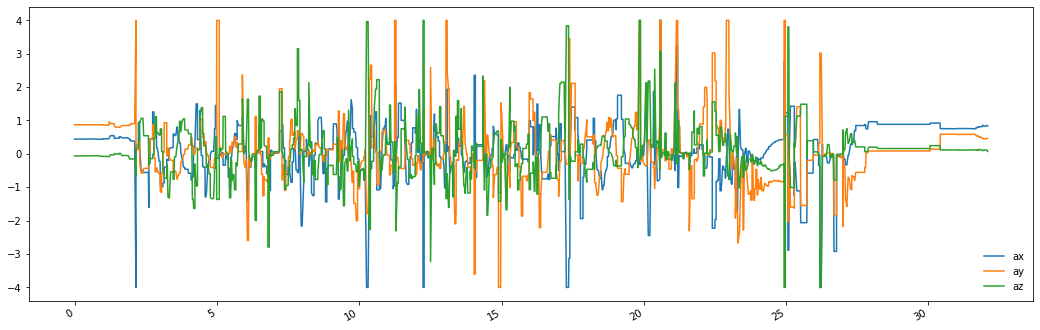

In [20]:
print(f'Plotting values from row {l_bound} to row {u_bound}')

# selected elapsed time
x = ball_IMU['elapsed_time']

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = ball_IMU['ax']
ax.plot(x,y, label='ax')

# plot y
y = ball_IMU['ay']
ax.plot(x,y, label='ay')

# plot z
y = ball_IMU['az']
ax.plot(x,y, label='az')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
plt.show()

### Gyroscope

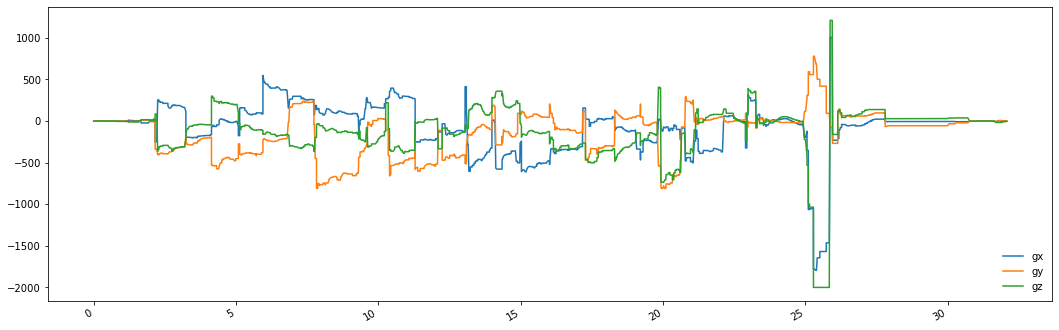

In [21]:
# selected elapsed time
x = ball_IMU['elapsed_time']

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = ball_IMU['gx']
ax.plot(x,y, label='gx')


# plot y
y = ball_IMU['gy']
ax.plot(x,y, label='gy')

# plot z
y = ball_IMU['gz']
ax.plot(x,y, label='gz')

# plot absolute
# y = raw_data['spin_abs'][l_bound:u_bound]
# ax.plot(x,y, label='spin_abs')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)

plt.show()

### Magnetometer

Plotting values from row 1600 to row 1600


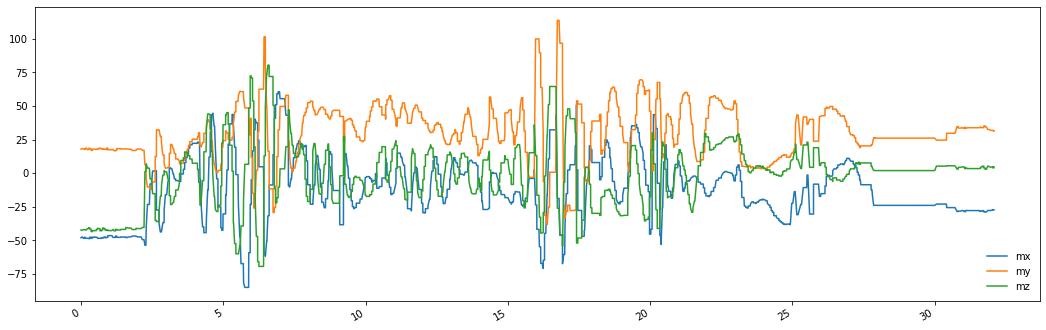

In [22]:
print(f'Plotting values from row {l_bound} to row {u_bound}')

# selected elapsed time
x = ball_IMU['elapsed_time']

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = ball_IMU['mx']
ax.plot(x,y, label='mx')


# plot y
y = ball_IMU['my']
ax.plot(x,y, label='my')

# plot z
y = ball_IMU['mz']
ax.plot(x,y, label='mz')

# plot absolute
# y = raw_data['spin_abs'][l_bound:u_bound]
# ax.plot(x,y, label='spin_abs')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)

plt.show()

recording data from row 1600 to row 1600
sample rate accel: 1.0 Hz


IndexError: tuple index out of range

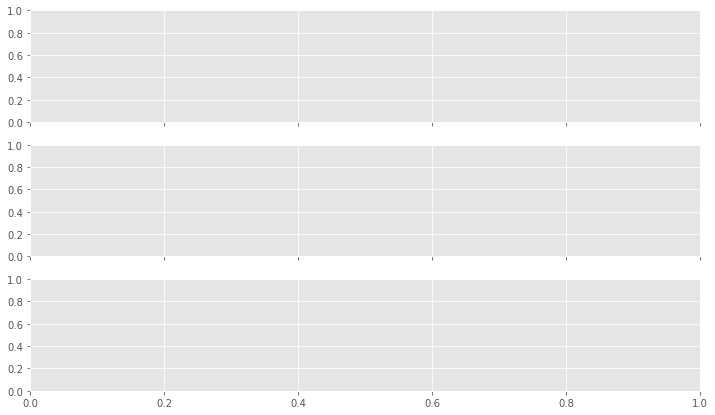

In [25]:
plt.style.use('ggplot') # matplotlib visual style setting

# ii = len(ball_df['elapsed_time']) # number of points
ii = u_bound
t1 = min(ball_df['elapsed_time']) # for calculating sample rate

# prepping for visualization
mpu6050_str = ['accel-x','accel-y','accel-z','gyro-x','gyro-y','gyro-z']
AK8963_str = ['mag-x','mag-y','mag-z']
mpu6050_vec,AK8963_vec,t_vec = [],[],[]

print(f'recording data from row {l_bound} to row {u_bound}')
for ii in range(l_bound, ii):

    ax,ay,az,wx,wy,wz = ball_IMU['ax'][ii], ball_IMU['ay'][ii], ball_IMU['az'][ii], ball_IMU['gx'][ii], ball_IMU['gy'][ii], ball_IMU['gz'][ii]
    mx,my,mz = ball_IMU['mx'][ii], ball_IMU['my'][ii], ball_IMU['mz'][ii]

    t_vec.append(ball_IMU['elapsed_time'][ii]) # capture timestamp
    AK8963_vec.append([mx,my,mz])
    mpu6050_vec.append([ax,ay,az,wx,wy,wz])
    
print('sample rate accel: {} Hz'.format(ii/((u_bound)-t1))) # print the sample rate
# t_vec = np.subtract(t_vec,t_vec[0])
# print(f'time {t_vec}')

# plot the resulting data in 3-subplots, with each data axis
fig,axs = plt.subplots(3,1,figsize=(12,7),sharex=True)
cmap = plt.cm.Set1

ax = axs[0] # plot accelerometer data
for zz in range(0,np.shape(mpu6050_vec)[1]-3):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax.legend(bbox_to_anchor=(1.12,0.9))
ax.set_ylabel('Acceleration [g]',fontsize=12)

ax2 = axs[1] # plot gyroscope data
for zz in range(3,np.shape(mpu6050_vec)[1]):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax2.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('Angular Vel. [dps]',fontsize=12)

ax3 = axs[2] # plot magnetometer data
for zz in range(0,np.shape(AK8963_vec)[1]):
    data_vec = [ii[zz] for ii in AK8963_vec]
    ax3.plot(t_vec,data_vec,label=AK8963_str[zz],color=cmap(zz+6))
ax3.legend(bbox_to_anchor=(1.12,0.9))
ax3.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
ax3.set_xlabel('Time [s]',fontsize=14)

fig.align_ylabels(axs)
plt.show()

# Animated Plot for acceleration

trying to make a rolling 50 row graph for acceleration

### https://matplotlib.org/stable/gallery/animation/simple_anim.html
### https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

1600 1600 1
32.083 32.083 -0.0224698788880999 -0.0224698788880999


<IPython.core.display.Javascript object>


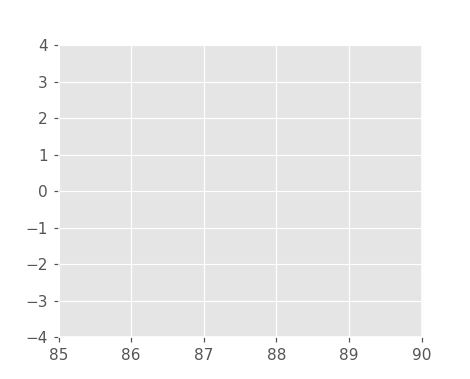

In [26]:
%matplotlib notebook


l_limit_s = 85 # in seconds
u_limit_s  = 150 # in seconds

min_bound = ball_df.iloc[(ball_df['elapsed_time']-l_limit_s).abs().argsort()[:1]].index.values[0]
max_bound = ball_df.iloc[(ball_df['elapsed_time']-u_limit_s).abs().argsort()[:1]].index.values[0]

num_frames = max_bound - min_bound +1
print(min_bound, max_bound, num_frames)
accel = []
time_list = []
for i in range(max_bound-min_bound+1):
    accel.append(ball_df['adjusted_acceleration'][min_bound+i])
    time_list.append(ball_df['elapsed_time'][min_bound+i])
# accel = raw_data['adjusted_acceleration'][min_bound:max_bound]
# time = raw_data['elapsed_time'][min_bound:max_bound]

print(min(time_list), max(time_list), min(accel), max(accel))

xmin = 0.0
xmax = 5.0

min_accel = min(accel)
max_accel = max(accel)

fig = plt.figure()
ax = plt.axes(xlim=(l_limit_s, l_limit_s+xmax), ylim=(-4, 4))
line, = ax.plot([], [], lw=2)


# fig = plt.figure()
# ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return line,

x = []
y = []

def animate(i):
    x.append(time_list[i])
    y.append(accel[i])
#     plt.axes(xlim=(time_list[i], time_list[i+100]))
    line.set_data(x, y)
    if x[i] >= l_limit_s+xmax:
        ax.axes.set_xlim(x[i]-xmax,x[i]+xmax)

    return line,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_frames, interval=1, blit=True)
plt.show()

In [27]:
%matplotlib inline

# Normalizing psition data to fit in the pitch

In [28]:
x_lower, x_upper = 60, 120
y_lower, y_upper = 0, 80

In [29]:
#normalizing x axis to the pitch size
ball_x = ball_df['ball_pos_x']
old_min = ball_x.min()
old_max = ball_x.max()

# l_norm = [lower + (upper - lower) * x for x in ball_x]
l_norm = [( (x - old_min) / (old_max - old_min) ) * (x_upper - x_lower) + x_lower for x in ball_x]
ball_df['ball_norm_x'] = l_norm

#normalizing y axis to the pitch size
ball_y = ball_df['ball_pos_y']
old_min = ball_y.min()
old_max = ball_y.max()

# l_norm = [lower + (upper - lower) * x for x in ball_x]
l_norm = [( (y - old_min) / (old_max - old_min) ) * (y_upper - y_lower) + y_lower for y in ball_y]
ball_df['ball_norm_y'] = l_norm

ball_df[['ball_pos_x', 'ball_norm_x', 'ball_pos_y','ball_norm_y']][110:120]

,ball_pos_x,ball_norm_x,ball_pos_y,ball_norm_y
110,1737.0,69.991254,330.0,1.412404
111,1737.0,69.991254,330.0,1.412404
112,1737.0,69.991254,330.0,1.412404
113,1737.0,69.991254,330.0,1.412404
114,1737.0,69.991254,330.0,1.412404
115,1737.0,69.991254,330.0,1.412404
116,1737.0,69.991254,330.0,1.412404
117,1726.0,69.875809,291.0,0.000000
118,1726.0,69.875809,291.0,0.000000
119,1726.0,69.875809,291.0,0.000000


In [30]:
y_max, y_min = ball_df['ball_norm_y'].max(), ball_df['ball_norm_y'].min()
print(y_max, y_min)
view = [ball_df['ball_pos_x'].describe(), ball_df['ball_norm_x'].describe(), ball_df['ball_pos_y'].describe(), ball_df['ball_norm_y'].describe()]
view


80.0 0.0


[count    1601.000000
 mean     3006.086196
 std      1692.173741
 min       785.000000
 25%      1762.000000
 50%      2722.000000
 75%      3995.000000
 max      6502.000000
 Name: ball_pos_x, dtype: float64,
 count    1601.000000
 mean       83.310333
 std        17.759389
 min        60.000000
 25%        70.253630
 50%        80.328844
 75%        93.688998
 max       120.000000
 Name: ball_norm_x, dtype: float64,
 count    1601.000000
 mean     1361.982511
 std       538.362972
 min       291.000000
 25%      1010.000000
 50%      1377.000000
 75%      1733.000000
 max      2500.000000
 Name: ball_pos_y, dtype: float64,
 count    1601.000000
 mean       38.786148
 std        19.497075
 min         0.000000
 25%        26.038932
 50%        39.330014
 75%        52.222725
 max        80.000000
 Name: ball_norm_y, dtype: float64]

In [31]:
# normalizing x axis to the pitch size
player_x = player_df['player_pos_x']
old_min = player_x.min()
old_max = player_x.max()
# l_norm = [lower + (upper - lower) * x for x in ball_x]
l_norm = [( (x - old_min) / (old_max - old_min) ) * (x_upper - x_lower) + x_lower for x in player_x]
player_df['player_norm_x'] = l_norm

#normalizing y axis to the pitch size
player_y = player_df['player_pos_y']
old_min = player_y.min()
old_max = player_y.max()
# l_norm = [lower + (upper - lower) * x for x in ball_x]
l_norm = [( (y - old_min) / (old_max - old_min) ) * (y_upper - y_lower) + y_lower for y in player_y]
player_df['player_norm_y'] = l_norm
player_df[['player_pos_x', 'player_norm_x', 'player_pos_y','player_norm_y']][110:120]

,player_pos_x,player_norm_x,player_pos_y,player_norm_y
110,1769.0,73.909543,603.0,22.349958
111,1769.0,73.909543,603.0,22.349958
112,1769.0,73.909543,603.0,22.349958
113,1759.0,73.767464,640.0,23.601014
114,1759.0,73.767464,640.0,23.601014
115,1759.0,73.767464,640.0,23.601014
116,1786.0,74.151077,580.0,21.572274
117,1786.0,74.151077,580.0,21.572274
118,1786.0,74.151077,580.0,21.572274
119,1786.0,74.151077,580.0,21.572274


In [32]:
y_max, y_min = player_df['player_norm_y'].max(), player_df['player_norm_y'].min()
print(y_max, y_min)
view = [player_df['player_pos_x'].describe(), player_df['player_norm_x'].describe(), player_df['player_pos_y'].describe(), player_df['player_norm_y'].describe()]
view
# player_df['player_norm_x'].describe()

80.0 0.0


[count    1601.000000
 mean     2393.054341
 std      1062.453674
 min       790.000000
 25%      1663.000000
 50%      2226.000000
 75%      2944.000000
 max      5013.000000
 Name: player_pos_x, dtype: float64,
 count    1601.000000
 mean       82.776050
 std        15.095245
 min        60.000000
 25%        72.403505
 50%        80.402557
 75%        90.603836
 max       120.000000
 Name: player_norm_x, dtype: float64,
 count    1601.000000
 mean     1305.972517
 std       506.216051
 min       -58.000000
 25%       914.000000
 50%      1286.000000
 75%      1672.000000
 max      2308.000000
 Name: player_pos_y, dtype: float64,
 count    1601.000000
 mean       46.119105
 std        17.116350
 min         0.000000
 25%        32.865596
 50%        45.443787
 75%        58.495351
 max        80.000000
 Name: player_norm_y, dtype: float64]

# Heatmaps

[[1763. 1763. 1763. ... 6352. 6352. 6352.]
 [ 330.  330.  330. ... 1212. 1212. 1212.]]


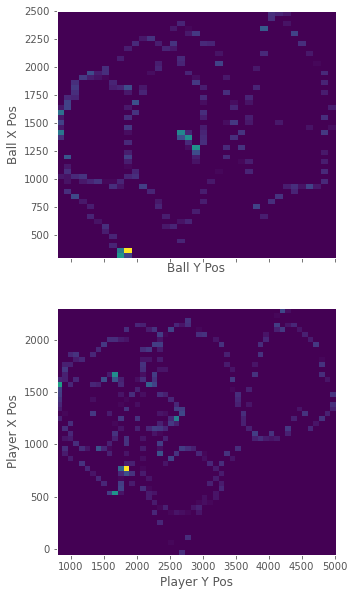

In [33]:
ball_pos = np.array((ball_df['ball_pos_x'], ball_df['ball_pos_y']))
player_pos = np.array((player_df['player_pos_x'], player_df['player_pos_y']))
print(ball_pos)

# plt.imshow(ball_pos, cmap='hot', interpolation='nearest')
# plt.show()

fig,axs = plt.subplots(2,1,figsize=(5,10),sharex=True)


# plot ball data
ax = axs[0] 
x_ball, y_ball = ball_pos

ax.set_ylabel('Ball X Pos',fontsize=12)
ax.set_xlabel('Ball Y Pos',fontsize=12)

ax.hist2d(x_ball,y_ball, bins=[50,50])


# plot player data
ax2 = axs[1] 
x_player, y_player = player_pos
ax2.set_ylabel('Player X Pos',fontsize=12)
ax2.set_xlabel('Player Y Pos',fontsize=12)

#correct bins by th desired size
ax2.hist2d(x_player,y_player, bins=[50,50])


fig.align_ylabels(axs)
plt.show()


# plt.hexbin(x,y, bins=[100,100])

# fig.align_ylabels(axs)
# plt.show()

# Pitch

Using defined pitch lybrary avaiable in the link below: <br>
https://mplsoccer.readthedocs.io/en/latest/ <br>
https://fcpython.com/visualisation/football-heatmaps-seaborn

In [35]:
# !pip install mplsoccer

In [36]:
from mplsoccer.pitch import Pitch
import seaborn as sns

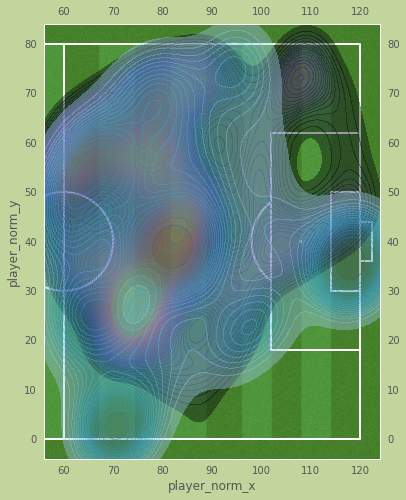

In [37]:
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('#c2d59d')
ax.patch.set_facecolor('#22312b')

# Setup the pitch
pitch = Pitch(pitch_color='grass',stripe_color='#c2d59d', stripe=True, 
              line_color='white', axis=True, label=True, half=True,goal_type='box')
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# for row, ball_x in enumerate(ball_df['ball_pos_x']):
#     plt.plot(ball_x, ball_df['ball_pos_y'][row], color='black')
#     plt.plot(player_df['player_pos_x'][row], player_df['player_pos_y'][row], color='white')

kde = sns.kdeplot(
x=player_df['player_norm_x'],
y=player_df['player_norm_y'],
    shade = True,
    alpha= 0.4,
    n_levels=40,
    cmap = 'magma'
)

kde = sns.kdeplot(
x=ball_df['ball_norm_x'],
y=ball_df['ball_norm_y'],
    shade = True,
    alpha= 0.4,
    n_levels=20
)

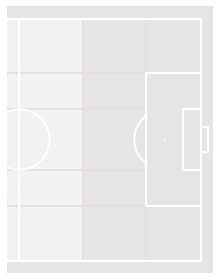

In [38]:
pitch = Pitch(positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', half=True,goal_type='box')
fig, ax = pitch.draw()


In [39]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

import matplotlib.patheffects as path_effects

from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG

[None, None, None, None, None, None, None, None, None, None]

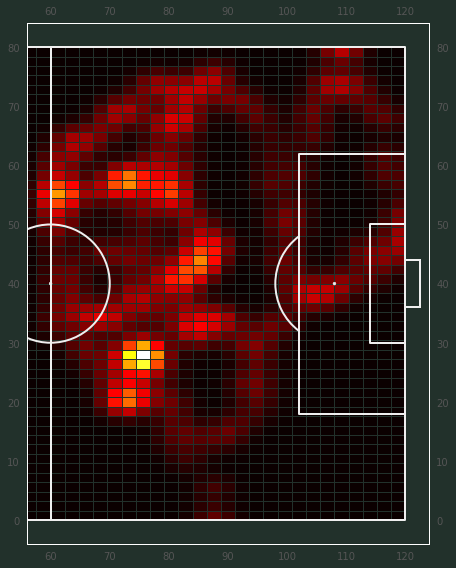

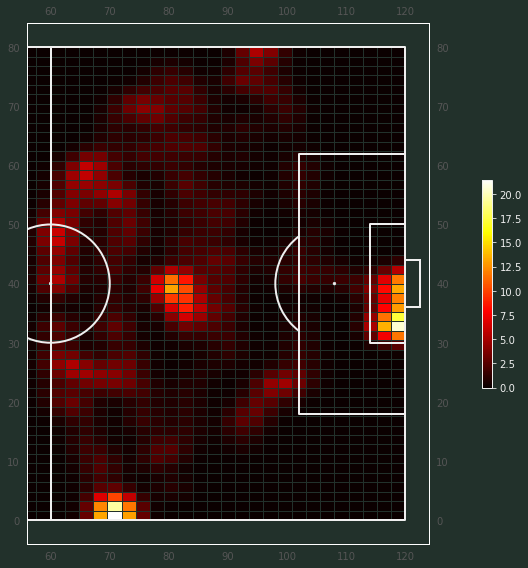

In [40]:
player_x = player_df['player_norm_x'],
player_y = player_df['player_norm_y']
ball_x = ball_df['ball_norm_x'],
ball_y = ball_df['ball_norm_y']
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef',
              axis=True, label=True, half=True, goal_type='box')
# draw player
fig, ax = pitch.draw(figsize=(15, 8))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(player_x, player_y, statistic='count', bins=(50, 50))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
plt.gca().invert_yaxis()

# draw ball
fig, ax = pitch.draw(figsize=(15, 8))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(ball_x, ball_y, statistic='count', bins=(50, 50))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap="hot", edgecolors='#22312b')
plt.gca().invert_yaxis()

# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.4)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')


In [41]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

%matplotlib notebook

<IPython.core.display.Javascript object>


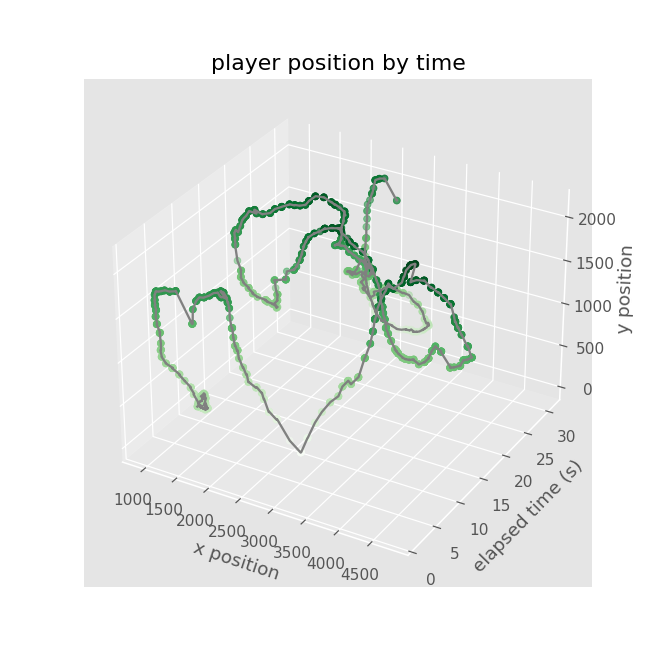

<IPython.core.display.Javascript object>


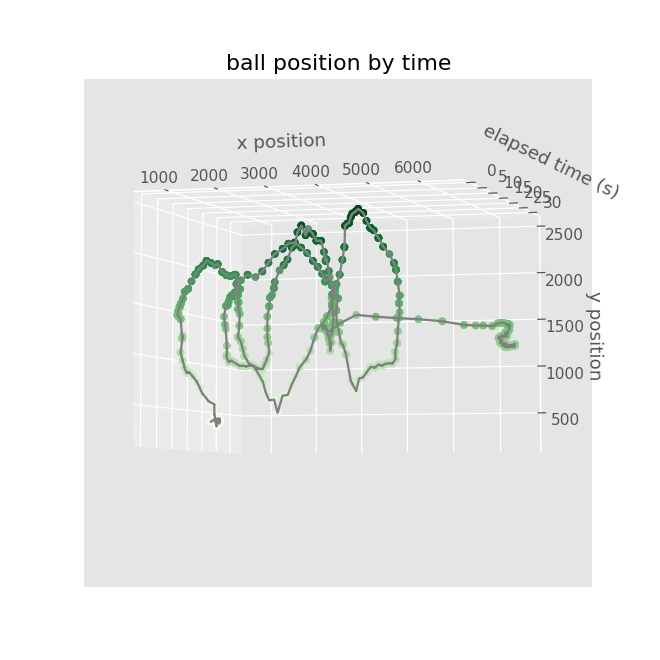

In [42]:
# ax = plt.axes(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Data for a three-dimensional line
zline = player_df['player_pos_y']
xline = player_df['player_pos_x']
yline = player_df['elapsed_time']
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = player_df['player_pos_y']
xdata = player_df['player_pos_x']
ydata = player_df['elapsed_time']

ax.set_xlabel("x position")

ax.set_ylabel("elapsed time (s)")

ax.set_zlabel("y position")

ax.set_xlim(player_df['player_pos_x'].min()-50,player_df['player_pos_x'].max()-50)

ax.set_ylim(player_df['elapsed_time'].min(),player_df['elapsed_time'].max())

ax.set_zlim(player_df['player_pos_y'].min()-50,player_df['player_pos_y'].max()-50)

ax.set_title("player position by time")

fig.set_size_inches(6, 6)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')



# ax = plt.axes(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Data for a three-dimensional line
zline = ball_df['ball_pos_y']
xline = ball_df['ball_pos_x']
yline = ball_df['elapsed_time']
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = ball_df['ball_pos_y']
xdata = ball_df['ball_pos_x']
ydata = ball_df['elapsed_time']

ax.set_xlabel("x position")

ax.set_ylabel("elapsed time (s)")

ax.set_zlabel("y position")

ax.set_xlim(ball_df['ball_pos_x'].min()-50,ball_df['ball_pos_x'].max()-50)

ax.set_ylim(ball_df['elapsed_time'].min(),ball_df['elapsed_time'].max())

ax.set_zlim(ball_df['ball_pos_y'].min()-50,ball_df['ball_pos_y'].max()-50)

ax.set_title("ball position by time")

fig.set_size_inches(6, 6)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

ax.view_init(0,0)
plt.show()

1600 1600 1


<IPython.core.display.Javascript object>


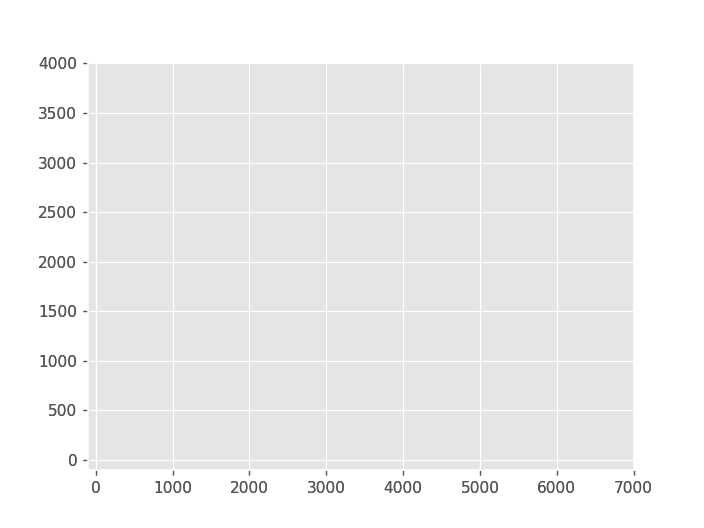

In [43]:
min_bound = ball_df.iloc[(ball_df['elapsed_time']-l_limit_s).abs().argsort()[:1]].index.values[0]
max_bound = ball_df.iloc[(ball_df['elapsed_time']-u_limit_s).abs().argsort()[:1]].index.values[0]

num_frames = max_bound - min_bound +1
print(min_bound, max_bound, num_frames)
ball_x = [ball_df['ball_pos_x'][min_bound+i] for i in range(max_bound-min_bound+1) ]
ball_y = [ball_df['ball_pos_y'][min_bound+i] for i in range(max_bound-min_bound+1) ]

player_x = [player_df['player_pos_x'][min_bound+i] for i in range(max_bound-min_bound+1) ]
player_y = [player_df['player_pos_y'][min_bound+i] for i in range(max_bound-min_bound+1) ]


xmin = 0.0
xmax = 5.0

min_x = -100
max_x = 7000
min_y = -100
max_y = 4000

fig = plt.figure()
ax = plt.axes(xlim=(min_x, max_x), ylim=(min_y,max_y))
line, = ax.plot([], [], lw=2)

ay = plt.axes(xlim=(min_x, max_x), ylim=(min_y,max_y))
line_player, = ay.plot([], [], lw=2)

def init():
    line.set_data([], [])
#     line_player.set_data([], [])
    return line#, line_player

def init2():
#     line.set_data([], [])
    line_player.set_data([], [])
    return line_player

x = []
y = []

x_player = []
y_player = []

def animate(i):
    x.append(ball_x[i])
    y.append(ball_y[i])

    line.set_data(x, y)

#     x_player.append(player_x[i])
#     y_player.append(player_y[i])

#     line_player.set_data(x_player, y_player)
#     print(f'ball: {x[i]}:{y[i]}, player: {x_player[i]}:{y_player[i]}')
    return line#,line_player


def animate2(i):
#     x.append(ball_x[i])
#     y.append(ball_y[i])

#     line.set_data(x, y)

    x_player.append(player_x[i])
    y_player.append(player_y[i])

    line_player.set_data(x_player, y_player)
    print(f'ball: {x[i]}:{y[i]}, player: {x_player[i]}:{y_player[i]}')
    return line_player


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_frames, interval=1, blit=True)
anim2 = animation.FuncAnimation(fig, animate2, init_func=init2,
                               frames=num_frames, interval=1, blit=True)
plt.show()

In [44]:
%matplotlib inline

ball: 6352.0:1212.0, player: 2464.0:1716.0


# To Do

<br>
Charts<br>

- [x] heatmaps
- action zone
- activity breakdown
- dinamic scatterplot
- [x] rolling acceleration
